<a href="https://colab.research.google.com/github/gregorywmorris/MLZoom2022/blob/main/Homework/MLZoomcampWeek4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework
Note: sometimes your answer doesn't match one of the options exactly. That's fine. Select the option that's closest to your solution.

In [39]:
%autosave 1

%load_ext autoreload
%autoreload 2

Autosaving every 1 seconds
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

##Dataset



In this homework, we will use Credit Card Data from book "Econometric Analysis".

Here's a wget-able link:

wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv

The goal of this homework is to inspect the output of different evaluation metrics by creating a classification model (target column **card**).

### Preparation 
Create the target variable by mapping yes to 1 and no to 0. Split the dataset into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split funciton for that with random_state=1.

In [41]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv'
!wget $data -O data.csv

--2022-10-02 13:15:10--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73250 (72K) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]  71.53K  --.-KB/s    in 0.008s  

2022-10-02 13:15:10 (8.34 MB/s) - ‘data.csv’ saved [73250/73250]



In [42]:
df = pd.read_csv('data.csv')

In [43]:
df.head(5) # 3 columns have yes and no for answers that need to be converted to 1's and 0's

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


* 3 columns have yes and no for answers that need to be converted to 1's and 0's
* column names are already normalized

In [44]:
binary_columns = ['card','owner','selfemp']
df[binary_columns] = (df[binary_columns] == 'yes').astype(int)

In [45]:
df.head(5) # confirm change

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5


In [46]:
df_full_train, df_val = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_test = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

#y_full_train = df_full_train.card.values
y_train = df_train.card.values
y_val = df_val.card.values
y_test = df_test.card.values

#del df_full_train['card']
del df_train['card']
del df_val['card']
del df_test['card']

# Question 1

**ROC AUC could also be used to evaluate feature importance of numerical variables.**

Let's do that

* For each numerical variable, use it as score and compute AUC with the card variable.
* Use the training dataset for that.

If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['expenditure'])

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

* ~~reports~~
* ~~dependents~~
* ~~active~~
* **share**

In [47]:
from sklearn.metrics import roc_auc_score

In [48]:
q1_columns = ['reports','dependents','active','share']

for i in q1_columns:
  score = roc_auc_score(y_train,df_train[i])
  if score < 0.5:
    score = roc_auc_score(y_train,-df_train[i])
  print(i,'  ', score)


reports    0.7166629860689376
dependents    0.5327757227773791
active    0.6043173411362006
share    0.989183643423692


In [49]:
# try subracting feature.
for i in q1_columns:
  score = roc_auc_score(y_train,df_train[i])
  if score < 0.5:
    score = roc_auc_score(y_train,-df_train[i])
  print(i,'  ', score)

reports    0.7166629860689376
dependents    0.5327757227773791
active    0.6043173411362006
share    0.989183643423692


In [50]:
# ask about RMSE and AUC

**Below is just for fun to see how these compare**

In [51]:
from sklearn.metrics import mutual_info_score

def mutual_info_card_score(series):
  return mutual_info_score(series, df_full_train.card)

mi = df_full_train[q1_columns].apply(mutual_info_card_score)
mi.sort_values(ascending = False)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


share         0.500485
reports       0.111301
active        0.025267
dependents    0.001211
dtype: float64

In [52]:
df_full_train[q1_columns].corrwith(df_full_train.card)

reports      -0.453501
dependents   -0.026171
active        0.089404
share         0.388468
dtype: float64

# Training the model

From now on, use these columns only:

`["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]`

Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

`LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`

In [53]:
features = ["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]

In [54]:
dv = DictVectorizer(sparse = False)
train_dict = df_train[features].to_dict(orient = 'records')
x_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
x_val = dv.transform(val_dict)

model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=1)
model.fit(x_train, y_train) 

y_pred = model.predict_proba(x_val)[:,1]

display((y_val == y_pred).mean())

0.6628787878787878

# Question 2

What's the AUC of this model on the validation dataset? (round to 3 digits)

* ~~0.615~~
* ~~0.515~~
* ~~0.715~~
* **0.995**

In [55]:
roc_auc_score(y_val, y_pred)

0.9956382001836548

# Question 3

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

* 0.1
* **0.3**
* 0.6
* 0.8

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
thresholds = np.linspace(0, 1, 101) 

scores = []

actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

for t in thresholds:

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    scores.append((t, tp, fp, fn, tn))

In [58]:
# create a dataframe
add_columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=add_columns)
# all rows, all colums, step=10
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,198,66,0,0
10,0.1,196,20,2,46
20,0.2,195,5,3,61
30,0.3,195,2,3,64
40,0.4,195,1,3,65
50,0.5,195,0,3,66
60,0.6,195,0,3,66
70,0.7,195,0,3,66
80,0.8,195,0,3,66
90,0.9,195,0,3,66


In [59]:
 # Precision = TP / TP + FP
 df_scores['pre'] = df_scores.tp / (df_scores.tp + df_scores.fp)

# Recall = TP / TP + FN

df_scores['re'] = df_scores.tp / (df_scores.tp + df_scores.fn)



```
idx = np.argwhere(np.diff(np.sign(f - g))).flatten()
plt.plot(x[idx], f[idx], 'ro')
```



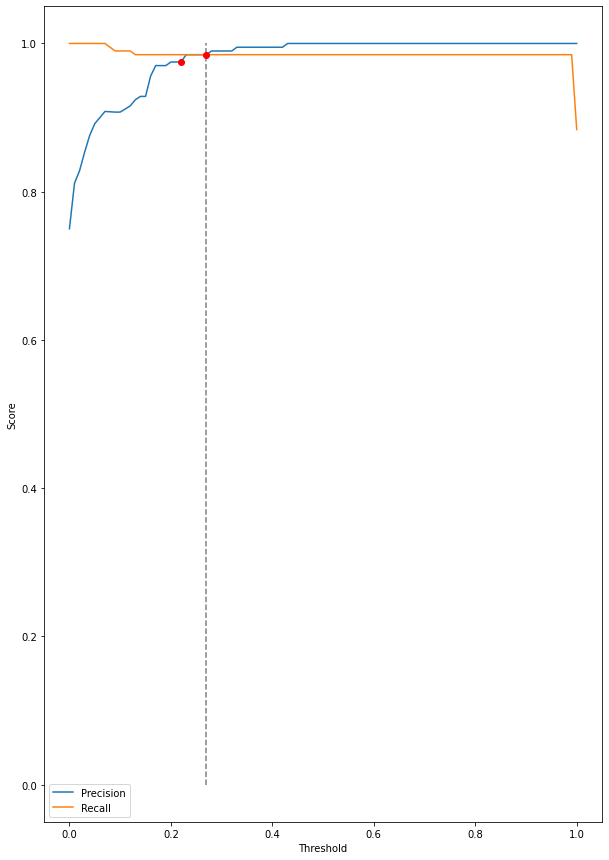

In [94]:
plt.figure(figsize=(10,15))

plt.plot(df_scores.threshold, df_scores['pre'], label='Precision')
plt.plot(df_scores.threshold, df_scores['re'], label='Recall')

idx = np.argwhere(np.diff(np.sign(df_scores.pre - df_scores.re))).flatten()
plt.plot(df_scores.threshold[idx], df_scores.pre[idx], 'ro')

# verticle dashed line
plt.vlines(0.27, 0, 1, color='grey', linestyle='--', alpha=1) # 0.27


plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()

#Question 4

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

F1 = 2 * P * R / (P + R)

Where P is precision and R is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

* **0.1**
* 0.4
* 0.6
* 0.7

In [61]:
scores2 = []

actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

for t in thresholds:

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    # F1 = 2 * P * R / (P + R)
    f1 = (2* (tp/(tp+fp)) * (tp/(tp+fn))) / (tp/(tp+fp)) + (tp/(tp+fn))

    scores2.append((t, tp, fp, fn, tn, f1))

In [62]:
add_columns2 = ['threshold', 'tp', 'fp', 'fn', 'tn','f1']
df_scores2 = pd.DataFrame(scores2, columns=add_columns2)

In [63]:
df_scores2.head(20)

,threshold,tp,fp,fn,tn,f1
0,0.00,198,66,0,0,3.000000
1,0.01,198,46,0,20,3.000000
2,0.02,198,41,0,25,3.000000
3,0.03,198,34,0,32,3.000000
4,0.04,198,28,0,38,3.000000
5,0.05,198,24,0,42,3.000000
6,0.06,198,22,0,44,3.000000
7,0.07,198,20,0,46,3.000000
8,0.08,197,20,1,46,2.984848
9,0.09,196,20,2,46,2.969697


#Question 5

Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

`KFold(n_splits=5, shuffle=True, random_state=1)`

* Iterate over different folds of df_full_train
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard devidation of the AUC scores across different folds?

* **0.003**
* 0.014
* 0.09
* 0.24

In [64]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [65]:
def train(df,y):
  train_dict = df.to_dict(orient='records')

  dv = DictVectorizer(sparse=False)
  x_train = dv.fit_transform(train_dict)

  model = LogisticRegression()
  model.fit(x_train, y)

  return dv, model

In [66]:
def predict(df,dv, model):
  var_dict = df.to_dict(orient='records')
  
  x = dv.transform(var_dict)
  y_pred = model.predict_proba(x)[:,1]

  return y_pred

In [67]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [68]:
k_scores = []

for train_idx,val_idx in kfold.split(df_full_train):
  df_train = df_full_train.iloc[train_idx]
  df_val = df_full_train.iloc[val_idx]

  y_train = df_train.card.values
  y_val = df_val.card.values

  del df_train['card']
  del df_val['card']

  dv, model = train(df_train, y_train)
  y_pred = predict(df_val, dv, model)

  auc = roc_auc_score(y_val, y_pred)
  k_scores.append(auc)

  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [69]:
round(np.mean(k_scores),3), round(np.std(k_scores), 3)

(0.997, 0.003)

#Question 6

Now let's use 5-Fold cross-validation to find the best parameter C

* Iterate over the following C values: `[0.01, 0.1, 1, 10]`
* Initialize KFold with the same parameters as previously
* Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which C leads to the best mean score?

* 0.01
* **0.1**
* 1
* 10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C

In [70]:
def train(df, y, C=1.0):
    dicts = df.to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y)
    
    return dv, model

In [71]:
def predict(df, dv, model):
    dicts = df.to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [72]:
df_full_train, df_val = train_test_split(df, test_size=0.2, random_state=1)

In [73]:
df_full_train.head(3)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
710,0,1,36.83333,3.0000,0.000400,0.000000,1,0,1,12,1,16
1258,1,0,35.58333,3.5606,0.109084,323.587500,0,0,0,12,1,0
435,1,0,25.66667,2.0000,0.004900,7.416667,0,0,0,26,1,13


In [74]:
for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

In [75]:
df_train.head(3)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
710,0,1,36.83333,3.0000,0.000400,0.000000,1,0,1,12,1,16
1258,1,0,35.58333,3.5606,0.109084,323.587500,0,0,0,12,1,0
435,1,0,25.66667,2.0000,0.004900,7.416667,0,0,0,26,1,13


In [76]:
n_splits = 5
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

for C in [0.01, 0.1, 1, 10]:

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.card.values
        y_val = df_val.card.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

C=0.01 0.998 +- 0.002
C=0.1 1.000 +- 0.000
C=1 1.000 +- 0.000
C=10 1.000 +- 0.000


#Submit the results

* Submit your results here: https://forms.gle/8TfKNRd5Jq7sGK5M9
* You can submit your solution multiple times. In this case, only the last submission will be used
* If your answer doesn't match options exactly, select the closest one

##Deadline
The deadline for submitting is October 3 (Monday), 23:00 CEST.

After that, the form will be closed.